<a href="https://colab.research.google.com/github/ryanhao1115/GNN-Learning/blob/main/GNN_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Add this in a Google Colab cell to install the correct version of Pytorch Geometric.
import torch

def format_pytorch_version(version):
  return version.split('+')[0]

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)

def format_cuda_version(version):
  return 'cu' + version.replace('.', '')

CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)

!pip install torch-scatter     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse      -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-geometric 

Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111.html
     |████████████████████████████████| 7.9 MB 4.1 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111.html
     |████████████████████████████████| 3.5 MB 4.4 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111.html
     |████████████████████████████████| 2.3 MB 4.4 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111.html
     |████████████████████████████████| 747 kB 4.0 MB/s 
     |████████████████████████████████| 325 kB 3.9 MB/s 
     |████████████████████████████████| 407 kB 40.9 MB/s 
     |████████████████████████████████| 45 kB 3.1 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.0.2-py3-none-any.whl size=535570 sha256=61c178bae6096fed4b74eb90f00010c8b25beece5c6e2e18722832bda69d444e
  Stored in directory: /root/.cache/pip/wheels/3f/08/13/2321517088bb2e95bfd0e45033bb9c923189e5b2078e0be4ef
Successfully built to

In [1]:
from torch_geometric.data import Data

# edge_index of size 2x6 corresponding to 6 edges
edge_index = torch.tensor([
                           [0, 1, 1, 2, 4, 3], # source nodes
                           [1, 0, 2, 3, 3, 1]  # target nodes
                           ],dtype=torch.long)

# feature matrix that stores the features of the nodes of size 5x2
x = torch.tensor([[-1, 0],
                  [ 0, 1],
                  [ 1,-1],
                  [-1, 0],
                  [ 0, 1]], dtype=torch.float)

# feature matrix that stores the features of the edges of size 6x1
edge_attr = torch.tensor([[170.],
                          [200.],
                          [120.],
                          [100.],
                          [230.],
                          [100.]], dtype=torch.float)

# Initialize a Data object
data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr)


ModuleNotFoundError: ignored

In [15]:
print(data)

Data(x=[5, 2], edge_index=[2, 6], edge_attr=[6, 1])


In [3]:
print("Number of nodes: ",data.num_nodes)
print("Number of edges:",data.num_edges)
print("Is this an undirected graph?",data.is_undirected())
print("Number of features per node (length of feature vector)",data.num_node_features,"\n")
print("Number of features per edge (length of feature vector)",data.num_edge_features,"\n")

Number of nodes:  5
Number of edges: 6
Is this an undirected graph? False
Number of features per node (length of feature vector) 2 

Number of features per edge (length of feature vector) 1 



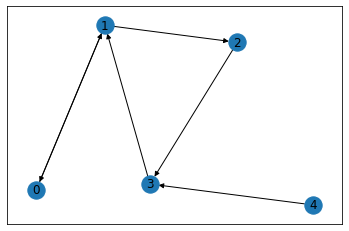

In [4]:
from torch_geometric.utils.convert import to_networkx
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

G = to_networkx(data)
nx.draw_networkx( G=G )

In [5]:
from torch_geometric.datasets import Planetoid

In [6]:
dataset_pubmed = Planetoid(root="./tmp", name="PubMed")

Processing...
Done!


In [10]:
print("Name of dataset", dataset_pubmed.name)
print("Number of graphs", dataset_pubmed.len())
print("Number of node features per node in a graph", dataset_pubmed.num_node_features)
print("Number of edge features per edge in a graph", dataset_pubmed.num_edge_features)
print("Number of possible node classes", dataset_pubmed.num_classes)

Name of dataset PubMed
Number of graphs 1
Number of node features per node in a graph 500
Number of edge features per edge in a graph 0
Number of possible node classes 3


In [17]:
graph_pubmed = dataset_pubmed[0]

In [13]:
print("Number of nodes: ",Gra.num_nodes)
print("Number of edges:",Gra.num_edges)

Number of nodes:  19717
Number of edges: 88648


In [14]:
print(Gra)

Data(x=[19717, 500], edge_index=[2, 88648], y=[19717], train_mask=[19717], val_mask=[19717], test_mask=[19717])


In [18]:
print("Unique labels of the nodes: ", graph_pubmed.y.unique())
print("Unique labels of the nodes: ", graph_pubmed.y[0:10])

Unique labels of the nodes:  tensor([0, 1, 2])
Unique labels of the nodes:  tensor([1, 1, 0, 2, 1, 2, 2, 1, 2, 1])
